# **IMPORT MODULES**

In [315]:
#step 1: import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from numpy import math
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud
#VECTORIZATION
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score,  roc_auc_score, classification_report, confusion_matrix, roc_curve, auc
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# **LOAD DATASETS**

In [316]:
()#step 2: load datasets
df = pd.read_csv("/content/drive/MyDrive/Restaurant_Reviews.tsv", delimiter='\t', quoting=3)
#this is the dataset i used, you can click on this link: https://skillsbuild.edunetworld.com/courses/ai/sentiment/story_content/external_files/Restaurant_Reviews.tsv

# **EDA**

In [317]:
#prints out first 5 row of df
df.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [318]:
df.head().T
#changes configuration of table

,0,1,2,3,4
Review,Wow... Loved this place.,Crust is not good.,Not tasty and the texture was just nasty.,Stopped by during the late May bank holiday of...,The selection on the menu was great and so wer...
Liked,1,0,0,1,1


In [319]:
df.shape
#decribes the dimension of dataframe

(1000, 2)

In [320]:
df.describe()

,Liked
count,1000.00000
mean,0.50000
std,0.50025
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [321]:
df['Liked'].value_counts()


1    500
0    500
Name: Liked, dtype: int64

HENCE OUR DATASET HAVE EQUAL NUMBER OF POSITIVE AND NEGATIVE REVIEWS.

In [322]:
df['Liked'].describe()

count    1000.00000
mean        0.50000
std         0.50025
min         0.00000
25%         0.00000
50%         0.50000
75%         1.00000
max         1.00000
Name: Liked, dtype: float64

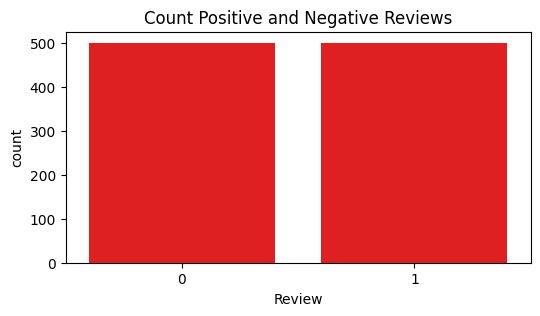

In [323]:
plt.figure(figsize=(6, 3))
sns.countplot(data=df, x='Liked', color='red',)  # 'red' is the color
plt.title('Count Positive and Negative Reviews')
plt.xlabel('Review')
plt.show()

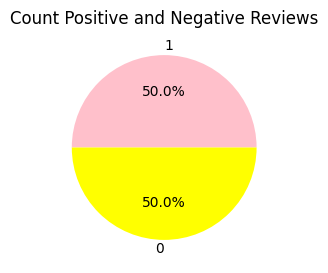

In [324]:
plt.figure(figsize=(6, 3))
like_counts=df['Liked'].value_counts()
plt.pie(like_counts, labels=like_counts.index, autopct='%1.1f%%', colors=['pink', 'yellow'])  # 'red' is the color
plt.title('Count Positive and Negative Reviews')

plt.show()

In [325]:
df['length']=df['Review'].apply(len)
#creating a new column called 'length' which gives length of each review

In [326]:
df.head()


,Review,Liked,length
0,Wow... Loved this place.,1,24
1,Crust is not good.,0,18
2,Not tasty and the texture was just nasty.,0,41
3,Stopped by during the late May bank holiday of...,1,87
4,The selection on the menu was great and so wer...,1,59


In [327]:
df.length.describe()

count    1000.000000
mean       58.315000
std        32.360052
min        11.000000
25%        33.000000
50%        51.000000
75%        80.000000
max       149.000000
Name: length, dtype: float64

In [328]:
#lets see what's the review with maximum characters i.e 149 which we got from above
df[df['length']==149]['Review'].iloc[0]

'The problem I have is that they charge $11.99 for a sandwich that is no bigger than a Subway sub (which offers better and more amount of vegetables).'

Text(0.5, 1.0, 'Number of characters in each review')

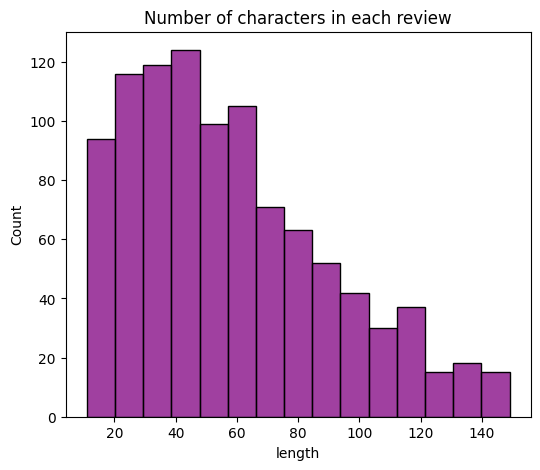

In [329]:
plt.figure(figsize=(6,5))
sns.histplot(data=df, x='length', color='purple')
plt.title('Number of characters in each review')

# **Clean Data by Removing Punctuations and Stopwords**

In [330]:
#lets print list of all stopwords of english language
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [331]:
#lets print all punctuations
[punc for punc in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [332]:
#lets create a new function which removes punctuation n stopwords
def text_process(msg):
  nopunc = [char for char in msg if char not in string.punctuation] #keep only thoose characters which are not punctuation
  nopunc = ''.join(nopunc)    #converts characters back to word
  eng_stopwords = set(stopwords.words('english'))
  remove_words = {'not', 'nor','no',"don't", "was'nt", "aren't", "didn't"}
  #we need to ensure that we wont remove words such as not, because this words are important as it may give a different meaning to review.
  new_stopwords = eng_stopwords - remove_words
  return ' '.join([word for word in nopunc.split() if word.lower() not in new_stopwords])   #keep only those words which are not stopwords

In [333]:
#lets create a new column which is review part without ctopwords and punctuation
df['new_review']=df['Review'].apply(text_process)

In [334]:
df.head()

,Review,Liked,length,new_review
0,Wow... Loved this place.,1,24,Wow Loved place
1,Crust is not good.,0,18,Crust not good
2,Not tasty and the texture was just nasty.,0,41,Not tasty texture nasty
3,Stopped by during the late May bank holiday of...,1,87,Stopped late May bank holiday Rick Steve recom...
4,The selection on the menu was great and so wer...,1,59,selection menu great prices


# **Generate Word Cloud**

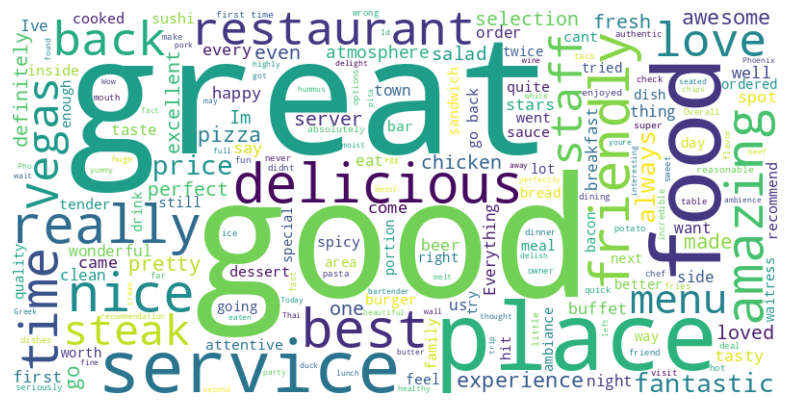

In [335]:
#generate word cloud
#positive comment wordcloud
word_cloud=df.loc[df['Liked']==1,:]
#create wordcloud for only positive comments
text = ' '.join([text for text in word_cloud['new_review']])
wrdcld = WordCloud(width = 800, height = 400, background_color = 'white').generate(text)
plt.figure(figsize = (10,5))
plt.imshow(wrdcld, interpolation = 'bilinear')
plt.axis('off')
plt.show()


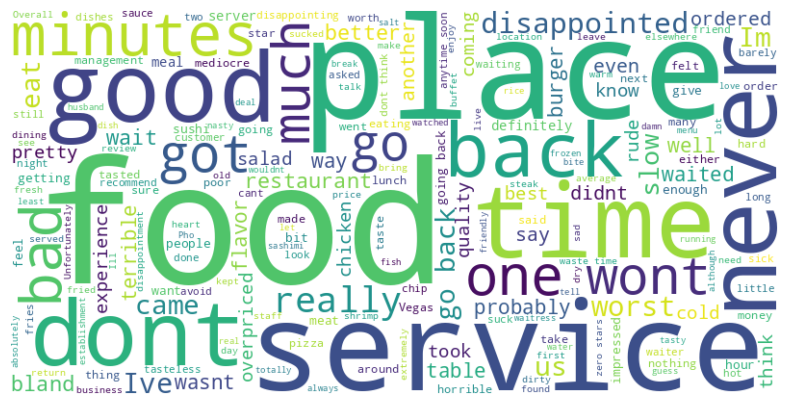

In [336]:
#negative reviews
word_cloud=df.loc[df['Liked']==0,:] #create wordcloud for only positive comments
text = ' '.join([text for text in word_cloud['new_review']])
wrdcld = WordCloud(width = 800, height = 400, background_color = 'white').generate(text)
plt.figure(figsize = (10,5))
plt.imshow(wrdcld, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# **VECTORIZATION**

In [337]:
#text to numerical by CountVectorizer Method
vectorizer = CountVectorizer(max_df=.9, min_df=4)
X = vectorizer.fit_transform(df['new_review']).toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [338]:
X_train, X_test, y_train, y_test = train_test_split(df['new_review'],df['Liked'],random_state=131, test_size= 0.2)

In [339]:
X_train.head()

173    Lordy Khao Soi dish not missed curry lovers
204                      Service friendly inviting
937                             Dont bother coming
891        rotating beers tap also highlight place
218                          small not worth price
Name: new_review, dtype: object

In [340]:
train_vectorized= vectorizer.transform(X_train)
test_vectorized= vectorizer.transform(X_test)

In [341]:
X_train_array = train_vectorized.toarray()
X_test_array = test_vectorized.toarray()
X_test_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

# **Logistic Regression Algorithm**

In [342]:
#using Logistic REgression algorithm
#create model
lr_model = LogisticRegression()
#train model
lr_model.fit(X_train_array, y_train)

LogisticRegression()

In [343]:
#lets make predictions
#we use trained logistic regression model to make predictions on test data
#and also if you want train data
y_train_preds_lr = lr_model.predict(X_train_array)
y_test_preds_lr = lr_model.predict(X_test_array)

In [344]:
y_test

634    0
754    0
219    1
705    0
940    0
      ..
648    1
557    0
606    1
197    0
517    1
Name: Liked, Length: 200, dtype: int64

In [345]:
y_test_preds_lr


array([0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1])

In [346]:
pd.DataFrame({'actual_y_value':y_test, "predicted_y_value":y_test_preds_lr})

,actual_y_value,predicted_y_value
634,0,0
754,0,1
219,1,1
705,0,0
940,0,0
...,...,...
648,1,1
557,0,0
606,1,1
197,0,0


In [347]:
#lets create a function that check accuracy and all
def print_metrics(actual,predicted):
  accuracy_scr = accuracy_score(actual, predicted)
  print("accuracy score is {}%".format(round(accuracy_scr*100,2)))
  print(" precision score is {}%".format( round((precision_score(actual, predicted))*100,2)))
  print("recall score is {}%".format(round((recall_score(actual, predicted))*100,2)))
  print("f1 score is {}%".format(round((f1_score(actual, predicted))*100,2)))
  print("roc auc score is {}%".format( round((roc_auc_score(actual, predicted))*100,2)))
  print("confusion matrix is {}".format(confusion_matrix(actual, predicted)))
  print("classification report is {}".format(classification_report(actual, predicted)))
  accuracy = round(accuracy_scr*100,2)
  return round(accuracy_scr*100,2),

In [348]:
print_metrics(y_train, y_train_preds_lr)
#evaluate training model

accuracy score is 90.38%
 precision score is 93.51%
recall score is 86.72%
f1 score is 89.99%
roc auc score is 90.37%
confusion matrix is [[377  24]
 [ 53 346]]
classification report is               precision    recall  f1-score   support

           0       0.88      0.94      0.91       401
           1       0.94      0.87      0.90       399

    accuracy                           0.90       800
   macro avg       0.91      0.90      0.90       800
weighted avg       0.91      0.90      0.90       800



(90.38,)

In [349]:
print_metrics(y_test, y_test_preds_lr)
#evaluate tseting model

accuracy score is 87.0%
 precision score is 88.66%
recall score is 85.15%
f1 score is 86.87%
roc auc score is 87.02%
confusion matrix is [[88 11]
 [15 86]]
classification report is               precision    recall  f1-score   support

           0       0.85      0.89      0.87        99
           1       0.89      0.85      0.87       101

    accuracy                           0.87       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.87      0.87      0.87       200



(87.0,)

In [350]:
#store our results in a table
results = pd.DataFrame(columns=['Model', 'accuracy_train(%)', 'precision_train(%)', 'accuracy_test(%)', 'precision_test(%)'])
test_accuracy=round(accuracy_score(y_test, y_test_preds_lr)*100,2)
test_precision=round(precision_score(y_test, y_test_preds_lr)*100,2)
train_accuracy=round(accuracy_score(y_train, y_train_preds_lr)*100,2)
train_precision=round(precision_score(y_train, y_train_preds_lr)*100,2)
results.loc[len(results)] = ['Logistic Regression', train_precision, train_accuracy, test_precision, test_accuracy]


In [351]:
results

,Model,accuracy_train(%),precision_train(%),accuracy_test(%),precision_test(%)
0,Logistic Regression,93.51,90.38,88.66,87.0


# **Hyperparameter Tuning of Logistic Regression**

In [352]:
#hyperparameter tuning of logistic regression
best_accuracy = 0.0
alpha_val = 0
for i in np.arange(0.01,1.1,0.1):
  #.1 is step size and 0.01 is starting value of sequence and 1.1 is ending value
  temp_cls = LogisticRegression(C=i)
  #for logistic regression we have C=1/alpha
  #where C is regularization parameter
  #here we were rounding alpha_val variable to i, which is float
  temp_cls.fit(X_train_array, y_train)
  y_test_preds_lr = temp_cls.predict(X_test_array)
  score = accuracy_score(y_test, y_test_preds_lr)
  print("accuracy score for C {} is {}%".format(round(i,1),round(score*100,2)))
  if score>best_accuracy:
    best_accuracy = score
    alpha_val = i
print("best accuracy {}% with C value {}".format(round(best_accuracy*100,2),round(alpha_val,1)))


accuracy score for C 0.0 is 81.0%
accuracy score for C 0.1 is 83.0%
accuracy score for C 0.2 is 85.0%
accuracy score for C 0.3 is 85.0%
accuracy score for C 0.4 is 85.5%
accuracy score for C 0.5 is 85.0%
accuracy score for C 0.6 is 86.0%
accuracy score for C 0.7 is 86.5%
accuracy score for C 0.8 is 86.5%
accuracy score for C 0.9 is 87.0%
accuracy score for C 1.0 is 87.0%
best accuracy 87.0% with C value 0.9


We can say that even after hyperparameter tuning we got same highest testing accuracy i.e. 87%. So we can use it for our further process like model inference.

# **Guassian Naive Bayes Model**

In [353]:
#lets make predictions
nb = GaussianNB() #Creates model
nb.fit(X_train_array, y_train)
#we use trained guassian naive bayes model to make predictions on test data and also if you want train data
y_train_preds_nb = nb.predict(X_train_array)
y_test_preds_nb = nb.predict(X_test_array)

In [354]:
y_test

634    0
754    0
219    1
705    0
940    0
      ..
648    1
557    0
606    1
197    0
517    1
Name: Liked, Length: 200, dtype: int64

In [355]:
y_test_preds_nb

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1])

In [356]:
pd.DataFrame({'actual_y_value':y_test, "predicted_y_value":y_test_preds_nb})

,actual_y_value,predicted_y_value
634,0,1
754,0,0
219,1,1
705,0,1
940,0,1
...,...,...
648,1,1
557,0,0
606,1,1
197,0,0


In [357]:
#evaluation of training model gor naive bayes algorithm
print_metrics(y_train, y_train_preds_nb)

accuracy score is 77.88%
 precision score is 69.61%
recall score is 98.75%
f1 score is 81.66%
roc auc score is 77.93%
confusion matrix is [[229 172]
 [  5 394]]
classification report is               precision    recall  f1-score   support

           0       0.98      0.57      0.72       401
           1       0.70      0.99      0.82       399

    accuracy                           0.78       800
   macro avg       0.84      0.78      0.77       800
weighted avg       0.84      0.78      0.77       800



(77.88,)

In [358]:
print_metrics(y_test, y_test_preds_nb)
#evaluate testing model

accuracy score is 75.0%
 precision score is 68.61%
recall score is 93.07%
f1 score is 78.99%
roc auc score is 74.82%
confusion matrix is [[56 43]
 [ 7 94]]
classification report is               precision    recall  f1-score   support

           0       0.89      0.57      0.69        99
           1       0.69      0.93      0.79       101

    accuracy                           0.75       200
   macro avg       0.79      0.75      0.74       200
weighted avg       0.79      0.75      0.74       200



(75.0,)

In [359]:
#store our results in a table
test_accuracy=round(accuracy_score(y_test, y_test_preds_nb)*100,2)
test_precision=round(precision_score(y_test, y_test_preds_nb)*100,2)
train_accuracy=round(accuracy_score(y_train, y_train_preds_nb)*100,2)
train_precision=round(precision_score(y_train, y_train_preds_nb)*100,2)
results.loc[len(results)] = ['Guassian Naive Bayes', train_precision, train_accuracy, test_precision, test_accuracy]


# **Hyper Parameter tuning of Guassian Naive Byes Model**

In [360]:
best_accuracy = 0.0
best_var_smoothing = 0

# Define a range of values for var_smoothing
var_smoothing_values = np.arange(0.01,1.1,0.1)

for var_smoothing in var_smoothing_values:
    temp_cls = GaussianNB(var_smoothing=var_smoothing)
    temp_cls.fit(X_train_array, y_train)
    y_test_preds_nb = temp_cls.predict(X_test_array)
    score = accuracy_score(y_test, y_test_preds_nb)
    print("Accuracy score for var_smoothing {} is {}%".format(round(var_smoothing,1), round(score * 100, 2)))
    if score > best_accuracy:
        best_accuracy = score
        best_var_smoothing = var_smoothing

print("Best accuracy {}% with var_smoothing value {}".format(round(best_accuracy * 100, 2), round(best_var_smoothing,1)))

Accuracy score for var_smoothing 0.0 is 77.0%
Accuracy score for var_smoothing 0.1 is 79.0%
Accuracy score for var_smoothing 0.2 is 75.5%
Accuracy score for var_smoothing 0.3 is 71.5%
Accuracy score for var_smoothing 0.4 is 67.5%
Accuracy score for var_smoothing 0.5 is 65.5%
Accuracy score for var_smoothing 0.6 is 64.5%
Accuracy score for var_smoothing 0.7 is 63.5%
Accuracy score for var_smoothing 0.8 is 64.0%
Accuracy score for var_smoothing 0.9 is 63.5%
Accuracy score for var_smoothing 1.0 is 62.5%
Best accuracy 79.0% with var_smoothing value 0.1


Now by hyperparameter tuning we have increased testing accuracy which is 79% for alpha 0.1.

# **TFID VECTORIZATION**

Now lets try with another method using TFID


In [361]:
vectorizer_2 = TfidfVectorizer(max_features=45) #trying with tfidvectorizer)

In [362]:
X_2 = vectorizer_2.fit_transform(df['new_review']).toarray()
X_2

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.39478847, ..., 0.        , 0.        ,
        0.47208317],
       [0.        , 0.        , 0.        , ..., 0.55499034, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [363]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(df['new_review'],df['Liked'],random_state=131, test_size= 0.2)

In [364]:
train_vectorized= vectorizer_2.transform(X2_train)
test_vectorized= vectorizer_2.transform(X2_test)

In [365]:
X2_train_array = train_vectorized.toarray()
X2_test_array = test_vectorized.toarray()
X2_test_array

array([[0.      , 0.      , 0.      , ..., 0.721976, 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       ...,
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ]])

In [366]:
#create model
rf_model = RandomForestClassifier(n_estimators=40, random_state = 1)
#train model
rf_model.fit(X2_train_array, y2_train)

RandomForestClassifier(n_estimators=40, random_state=1)

In [367]:
#lets make predictions
#we use trained random forest model to make predictions on test data and also if you want train data
y_train_preds_rf = rf_model.predict(X2_train_array)
y_test_preds_rf = rf_model.predict(X2_test_array)

In [368]:
y2_test

634    0
754    0
219    1
705    0
940    0
      ..
648    1
557    0
606    1
197    0
517    1
Name: Liked, Length: 200, dtype: int64

In [369]:
y_test_preds_rf

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1])

In [370]:
pd.DataFrame({'actual_y_value':y2_test, "predicted_y_value":y_test_preds_rf})

,actual_y_value,predicted_y_value
634,0,1
754,0,0
219,1,0
705,0,0
940,0,0
...,...,...
648,1,1
557,0,0
606,1,0
197,0,0


In [371]:
print_metrics(y2_train, y_train_preds_rf)
#training accuracy for random forest

accuracy score is 80.88%
 precision score is 91.84%
recall score is 67.67%
f1 score is 77.92%
roc auc score is 80.84%
confusion matrix is [[377  24]
 [129 270]]
classification report is               precision    recall  f1-score   support

           0       0.75      0.94      0.83       401
           1       0.92      0.68      0.78       399

    accuracy                           0.81       800
   macro avg       0.83      0.81      0.81       800
weighted avg       0.83      0.81      0.81       800



(80.88,)

In [372]:
print_metrics(y2_test, y_test_preds_rf)
#testing accuracy for random forest

accuracy score is 78.5%
 precision score is 87.18%
recall score is 67.33%
f1 score is 75.98%
roc auc score is 78.61%
confusion matrix is [[89 10]
 [33 68]]
classification report is               precision    recall  f1-score   support

           0       0.73      0.90      0.81        99
           1       0.87      0.67      0.76       101

    accuracy                           0.79       200
   macro avg       0.80      0.79      0.78       200
weighted avg       0.80      0.79      0.78       200



(78.5,)

In [373]:
#store our results in a table
test_accuracy=round(accuracy_score(y2_test, y_test_preds_rf)*100,2)
test_precision=round(precision_score(y2_test, y_test_preds_rf)*100,2)
train_accuracy=round(accuracy_score(y2_train, y_train_preds_rf)*100,2)
train_precision=round(precision_score(y2_train, y_train_preds_rf)*100,2)
results.loc[len(results)] = ['Random Forest', train_precision, train_accuracy, test_precision, test_accuracy]

In [374]:
#hyperparameter tuning for random forest
best_accuracy = 0.0
best_n_estimators = 0
best_random_state = 0

for n_estimators in range(10, 101, 10):  # Adjust the range as needed 10, 20 ,30 and so on
    for random_state in [42, 1, 5, 10]:  # Try different random_state values i.e 1, 5 , 10, 42
        temp_cls = RandomForestClassifier(n_estimators=n_estimators, random_state=random_state)
        temp_cls.fit(X2_train_array, y2_train)
        y_test_preds_rf = temp_cls.predict(X2_test_array)
        score = accuracy_score(y2_test, y_test_preds_rf)
        print("Accuracy score for n_estimators {} and random_state {} is {}%".format(n_estimators, random_state, round(score * 100, 2)))
        if score > best_accuracy:
            best_accuracy = score
            best_n_estimators = n_estimators
            best_random_state = random_state
print("Best accuracy {}% with n_estimators {} and random_state {}".format(round(best_accuracy * 100, 2), best_n_estimators, best_random_state))

Accuracy score for n_estimators 10 and random_state 42 is 75.5%
Accuracy score for n_estimators 10 and random_state 1 is 77.5%
Accuracy score for n_estimators 10 and random_state 5 is 75.5%
Accuracy score for n_estimators 10 and random_state 10 is 75.5%
Accuracy score for n_estimators 20 and random_state 42 is 77.0%
Accuracy score for n_estimators 20 and random_state 1 is 76.5%
Accuracy score for n_estimators 20 and random_state 5 is 78.0%
Accuracy score for n_estimators 20 and random_state 10 is 76.0%
Accuracy score for n_estimators 30 and random_state 42 is 77.0%
Accuracy score for n_estimators 30 and random_state 1 is 77.0%
Accuracy score for n_estimators 30 and random_state 5 is 76.5%
Accuracy score for n_estimators 30 and random_state 10 is 78.0%
Accuracy score for n_estimators 40 and random_state 42 is 77.0%
Accuracy score for n_estimators 40 and random_state 1 is 78.5%
Accuracy score for n_estimators 40 and random_state 5 is 77.0%
Accuracy score for n_estimators 40 and random_st

# **Decision Tree ALgorithm**

In [375]:
dt = DecisionTreeClassifier()
dt.fit(X_train_array,y_train)

DecisionTreeClassifier()

In [376]:
#lets make predictions
y_train_preds_dt = dt.predict(X_train_array)
y_test_preds_dt = dt.predict(X_test_array)

In [377]:
#evaluation of training model
print_metrics(y_train, y_train_preds_dt)

accuracy score is 97.5%
 precision score is 99.22%
recall score is 95.74%
f1 score is 97.45%
roc auc score is 97.5%
confusion matrix is [[398   3]
 [ 17 382]]
classification report is               precision    recall  f1-score   support

           0       0.96      0.99      0.98       401
           1       0.99      0.96      0.97       399

    accuracy                           0.97       800
   macro avg       0.98      0.97      0.97       800
weighted avg       0.98      0.97      0.97       800



(97.5,)

In [378]:
print_metrics(y_test, y_test_preds_dt)
#evaluate testing model

accuracy score is 81.5%
 precision score is 79.09%
recall score is 86.14%
f1 score is 82.46%
roc auc score is 81.45%
confusion matrix is [[76 23]
 [14 87]]
classification report is               precision    recall  f1-score   support

           0       0.84      0.77      0.80        99
           1       0.79      0.86      0.82       101

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200



(81.5,)

In [379]:
#store our results in a table
test_accuracy=round(accuracy_score(y2_test, y_test_preds_dt)*100,2)
test_precision=round(precision_score(y2_test, y_test_preds_dt)*100,2)
train_accuracy=round(accuracy_score(y2_train, y_train_preds_dt)*100,2)
train_precision=round(precision_score(y2_train, y_train_preds_dt)*100,2)
results.loc[len(results)] = ['Decision Tree', train_precision, train_accuracy, test_precision, test_accuracy]

# **Support Vector Machines (SVM):**

In [380]:
svm = SVC()
svm.fit(X_train_array, y_train)
predictions = svm.predict(X_test_array)
#prediction
y_train_preds_sv = svm.predict(X_train_array)
y_test_preds_sv = svm.predict(X_test_array)

In [381]:
#evaluation of training model
print_metrics(y_train, y_train_preds_dt)

accuracy score is 97.5%
 precision score is 99.22%
recall score is 95.74%
f1 score is 97.45%
roc auc score is 97.5%
confusion matrix is [[398   3]
 [ 17 382]]
classification report is               precision    recall  f1-score   support

           0       0.96      0.99      0.98       401
           1       0.99      0.96      0.97       399

    accuracy                           0.97       800
   macro avg       0.98      0.97      0.97       800
weighted avg       0.98      0.97      0.97       800



(97.5,)

In [382]:
print_metrics(y_test, y_test_preds_dt)
#evaluate testing model

accuracy score is 81.5%
 precision score is 79.09%
recall score is 86.14%
f1 score is 82.46%
roc auc score is 81.45%
confusion matrix is [[76 23]
 [14 87]]
classification report is               precision    recall  f1-score   support

           0       0.84      0.77      0.80        99
           1       0.79      0.86      0.82       101

    accuracy                           0.81       200
   macro avg       0.82      0.81      0.81       200
weighted avg       0.82      0.81      0.81       200



(81.5,)

In [383]:
#store our results in a table
test_accuracy=round(accuracy_score(y2_test, y_test_preds_sv)*100,2)
test_precision=round(precision_score(y2_test, y_test_preds_sv)*100,2)
train_accuracy=round(accuracy_score(y2_train, y_train_preds_sv)*100,2)
train_precision=round(precision_score(y2_train, y_train_preds_sv)*100,2)
results.loc[len(results)] = ['SVM', train_precision, train_accuracy, test_precision, test_accuracy]

# **Sort Our Result Table**

In [384]:
results = results.sort_values(by='accuracy_test(%)', ascending=False)
results

,Model,accuracy_train(%),precision_train(%),accuracy_test(%),precision_test(%)
4,SVM,97.57,94.25,92.86,85.5
0,Logistic Regression,93.51,90.38,88.66,87.0
2,Random Forest,91.84,80.88,87.18,78.5
3,Decision Tree,99.22,97.50,79.09,81.5
1,Guassian Naive Bayes,69.61,77.88,68.61,75.0


# **Since we got highest accuracy using SVM let's use it for confusion matrix and even for model inference**

In [385]:
cm = confusion_matrix(y_test, y_test_preds_sv)

Text(95.72222222222221, 0.5, 'Actual Values')

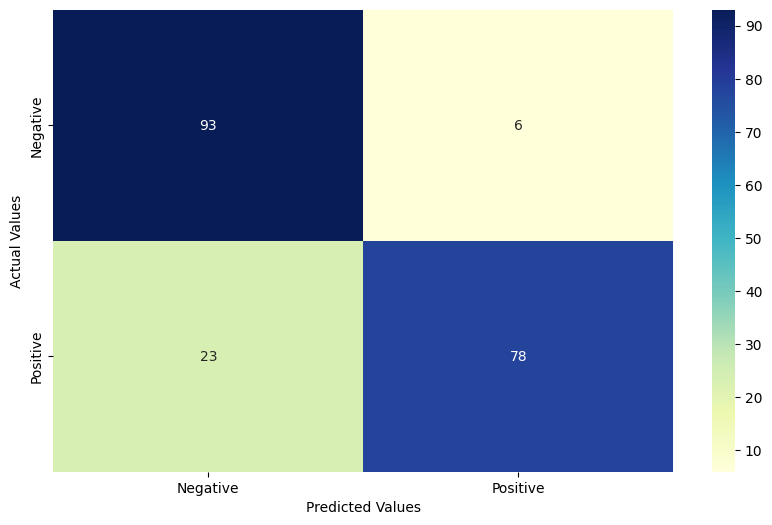

In [386]:
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot= True, cmap = "YlGnBu", xticklabels = ['Negative', 'Positive'], yticklabels = ['Negative', 'Positive'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

# **Model Inference using Logistic Regression Algorithm **

In [387]:
classifier = SVC()
classifier.fit(X_train_array, y_train)


SVC()

In [388]:
#lets define a function which vectorize our new given sample input and then preict the review
def predict_sentiment(sample):
  tokenized_review = text_process(sample) #removing stopwords nad punctuation from sample review
  vectorized_review = vectorizer.transform([sample]).toarray()
  return classifier.predict(vectorized_review)

In [389]:
#if you want you can give input to sample variable or we can give like this:
def predict(sample):
  if predict_sentiment(sample):
    print("it is a positive review")
  else:
    print("it is negative review")
new_review = "IT was minblowing, fantastic"
predict(new_review)

it is a positive review


In [390]:

new_review = "tasteless"
predict(new_review)

it is negative review


In [391]:
new_review = "it is not too good"
predict(new_review)

it is negative review


In [392]:
new_review = "fabulous, amazing"
predict(new_review)

it is a positive review


Hence my ML Model predicts sentiments are positive or negative too correctly even if negation words such as not, no, nay are present in our review. Generally negation words opposes positive condition, so considering them is important in order to train our model correctly. Hence I didn't remove negation stopwords.